# LinearDecoder

## Overview

### _**LinearDecoder**_ is a Python module designed to integrate techniques required for reconstructing external stimuli from evoked neural responses using machine learning approaches. This tool is particularly useful in neuroscience research, where understanding the relationship between neural activity and external stimuli is crucial.

One of the fascinating challenges in neuroscience is assessing how reliably neural responses reflect external stimuli. A common approach to this is decoding external stimuli from evoked neural responses, which can include various forms of neural data such as:

- Spiking activity
- Local Field Potentials (LFP)
- Electroencephalography (EEG) signals

The _**LinearDecoder**_ class provides functionality for this decoding process, facilitating the analysis of neural recordings and enhancing the interpretability of decoding results. This tool is valuable for researchers studying neural coding, sensory processing, and brain-computer interfaces.

### Methodology

_**LinearDecoder**_ employs a supervised learning algorithm to train a decoder with an exponential kernel. This approach aims to reconstruct external stimuli from evoked neural responses. The core of the method involves solving a regularized least squares problem to determine the weights of the linear decoder in a supervised manner.

Key features of the LinearDecoder include:
- Use of first-order statistics of neural decoding (amplitude and timing of evoked neural responses)
- Application of regularization techniques to improve generalization
- Flexibility to work with various types of neural data

## Current Limitations and Future Developments

It is important to note that the current version of _**LinearDecoder**_ focuses on first-order statistics, meaning it uses individual neural responses for decoding. Future developments may include:

- Incorporation of higher-order statistics for encoding information, such as network correlations and noise correlations
- Implementation of more advanced models, such as recurrent rate neural networks, to address the higher-order statistics

These enhancements would allow for more sophisticated analysis of neural data, potentially revealing deeper insights into neural coding mechanisms.

### Applications in Neuroscience Research

The LinearDecoder can be particularly useful in various neuroscience research areas, including:

1. **Multisensory Integration Studies**: Investigating how the brain combines information from different sensory modalities.
2. **Autism Research**: Examining how autism might modulate sensory integration processes.
3. **ADHD Studies**: Assessing whether attention deficit disorders have differential effects on auditory versus visual sensory processing.
4. **Brain-Computer Interfaces**: Developing systems that translate neural signals into control commands for external devices.
5. **Sensory Neuroscience**: Exploring how different sensory stimuli are encoded in neural activity.

By providing a tool for quantitative analysis of neural responses, _**LinearDecoder**_ contributes to our understanding of brain function and information processing in various contexts.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Installation

To install the _**LinearDecoder**_, ensure the necessary Python libraries **numpy** and **sklearn** are installed. Please verify that the corresponding dependencies are present. To confirm that the scripts and required libraries are installed on your local machine, navigate to the directory of the _**LinearDecoder**_ module. You can begin by testing the Python scripts within the project and scripts directories. To do this, install the Python library nose2 and execute it from the command line:
```
$ pip install nose2
$ python -m nose2
```

To **install** the _**LinearDecoder**_ module from GitHub, run the following command:

In [ ]:
!pip install git+ssh://git@github.com/fraziphy/LinearDecoder.git

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

To **uninstall** the module, please copy and execute the following command in a single cell:

```
!python -m pip uninstall LinearDecoder --yes
```

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------


## Usage

After a successful installation, you can import the module using the following syntax:
```
from lineardecoder import LinearDecoder # The Class to decode external stimuli from neural recordings 
```
Follow these steps to use the decoder:

### 1. Initialize the decoder
```
decoder = LinearDecoder(dt, tau, lambda_reg, rng)
```

**Parameters:**
- `dt`: Recording resolution (time step) in milliseconds.
- `tau`: Time constant for the exponential kernel in milliseconds.
- `lambda_reg`: Regularization strength to prevent overfitting.
- `rng`: Random number generator (e.g., `np.random.default_rng(seed)`).

### 2. Preprocess data
```
filtered_spikes = decoder.preprocess_data(spikes_trials_all, n_neurons, duration)
```

**Parameters:**
- `n_neurons`: Number of neurons in the recording.
- `duration`: Total duration of the recording in milliseconds.

**Note:** 
- `spikes_trials_all` should be a list of trials, where each trial is a list of tuples `(spike_time, neuron_id)`.
- The resulting `filtered_spikes` will have shape `(n_trials, n_steps, n_neurons)`.

### 3. Fit the decoder and make predictions
```
decoder.fit(filtered_spikes[training_trial_indices], signal)
prediction = decoder.predict(filtered_spikes[test_trial_indices])
RMSE = decoder.compute_rmse(prediction, signal)
```

### 4. Perform stratified cross-validation
```
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)
```

After performing stratified cross-validation, you can access:
- `decoder.example_predicted_train`: An example of a predicted signal for a training trial.
- `decoder.example_predicted_test`: An example of a predicted signal for a test trial.

## Important Considerations

- Ensure the signal is a 2D array with dimensions `(n_signals, n_time_steps)`.
- Make sure the signal has the same temporal resolution as your recording (determined by `dt`).
- The `duration` and `dt` parameters should match the temporal properties of your spike data and signal.

## Accessing Help

You can access this guide within your code by using:
```
decoder.help
```

This will print the usage instructions directly in your Python environment.

## Example Notebook

This Jupyter notebook demonstrates how to use the LinearDecoder class with dummy data. The notebook verifies that the defined class can perform decoding tasks effectively.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

In [ ]:
$ pip install nose2

In [3]:
# generate_data.py

import numpy as np

def dummy_spiketimes(n_neurons, duration, dt, avg_rate):
    """
    Generate dummy spike times for a population of neurons.

    Parameters:
    n_neurons (int): Number of neurons in the population.
    duration (float): Total duration of the simulation in milliseconds.
    dt (float): Time resolution in milliseconds.
    avg_rate (float): Average firing rate of neurons in Hz.

    Returns:
    list: A sorted list of tuples (spike_time, neuron_id).
    """

    # Calculate expected number of spikes per neuron
    spikes_per_neuron = int(duration * avg_rate / 1000)

    # Initialize list to store all spikes
    spike_list = []

    # Generate spikes for each neuron
    for neuron_id in range(n_neurons):
        # Generate random spike times for this neuron
        # Uniformly distributed over the duration
        neuron_spikes = np.random.rand(spikes_per_neuron) * duration

        # Round spike times to the nearest multiple of dt
        # This ensures spikes align with the time resolution
        neuron_spikes = np.round(neuron_spikes / dt) * dt

        # Add spikes to the list as tuples (spike_time, neuron_id)
        spike_list.extend([(spike_time, neuron_id) for spike_time in neuron_spikes])

    # Sort spikes by time to simulate chronological order
    spike_list.sort(key=lambda x: x[0])

    return spike_list


In [6]:
# plots.py

import matplotlib.pyplot as plt

def plot_raster(spike_1):
    """
    Create a raster plot of neuronal spike times.

    Parameters:
    spike_1 (list): A list of tuples, where each tuple contains (spike_time, neuron_id).

    This function creates a scatter plot where:
    - Each vertical line represents a spike
    - The x-axis represents time
    - The y-axis represents individual neurons
    """

    # Unpack the spike_1 list into separate lists of spike times and neuron IDs
    spike_times, neuron_ids = zip(*spike_1)

    # Create a new figure and axis object
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the spikes as vertical lines
    # 'marker="|"' creates vertical lines, 's=10' sets the size, 'c="black"' sets the color
    ax.scatter(spike_times, neuron_ids, marker='|', s=10, c='black')

    # Label the x-axis
    ax.set_xlabel('Time (ms)')

    # Label the y-axis
    ax.set_ylabel('Neuron ID')

    # Set the title of the plot
    ax.set_title('Spike Raster Plot')

    # Adjust y-axis limits to show all neurons
    # The 0.5 offset creates a small margin above and below the plotted neurons
    ax.set_ylim(min(neuron_ids) - 0.5, max(neuron_ids) + 0.5)

    # Display the plot
    plt.show()


In [2]:
from lineardecoder import LinearDecoder

In [72]:
n_neurons = 10000
duration = 200
dt = 0.1
avg_rate = 30

In [73]:
spikes_trials_all = []
for trial in range(20):
    spikes = dummy_spiketimes(n_neurons, duration, dt, avg_rate)
    spikes_trials_all.append(spikes)

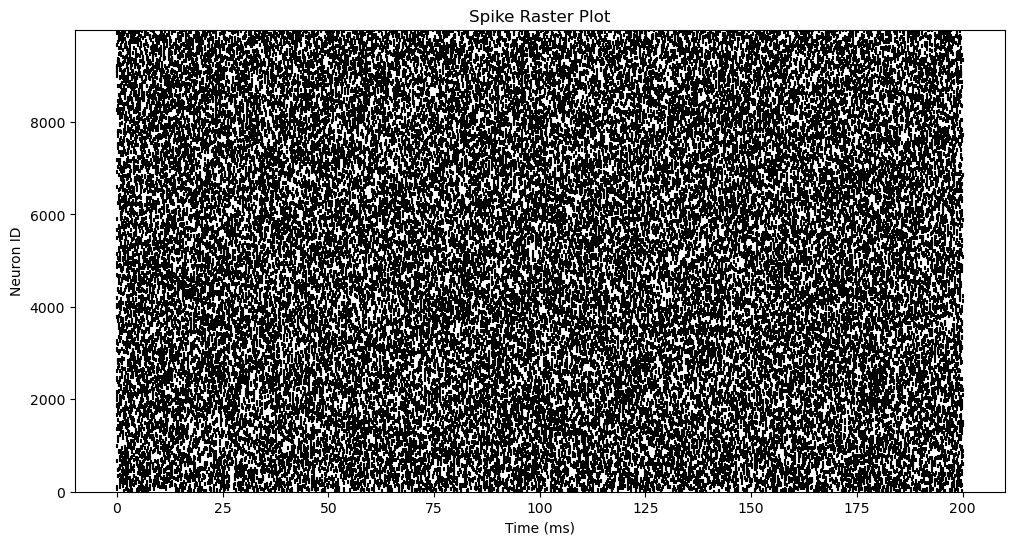

In [74]:
plot_raster(spikes_trials_all[0])

In [75]:
tau = 10
lambda_reg = 1e-3
rng=np.random.default_rng(2)

In [76]:
decoder = LinearDecoder(dt, tau, lambda_reg, rng)

In [77]:
filtered_spikes = decoder.preprocess_data(spikes_trials_all, n_neurons, duration)

In [78]:
training_trial_indices = np.arange(19)
time = np.arange(duration/dt)
signal = np.zeros((2,int(duration/dt)), dtype=float)
signal[0] = np.sin(5*np.pi*time/10000)
signal[1] = np.sin(10*np.pi*time/10000)

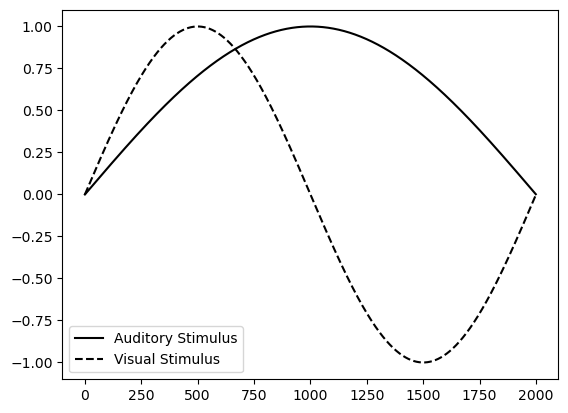

In [79]:
plt.plot(signal[0], "-k", label="Auditory Stimulus")
plt.plot(signal[1], "--k", label="Visual Stimulus")
plt.legend()

In [80]:
decoder.fit(filtered_spikes[training_trial_indices], signal)

In [81]:
prediction_trial = decoder.predict(filtered_spikes[19])
RMSE_trial = decoder.compute_rmse(prediction_trial, signal)

In [82]:
prediction.shape

(19, 2000, 2)

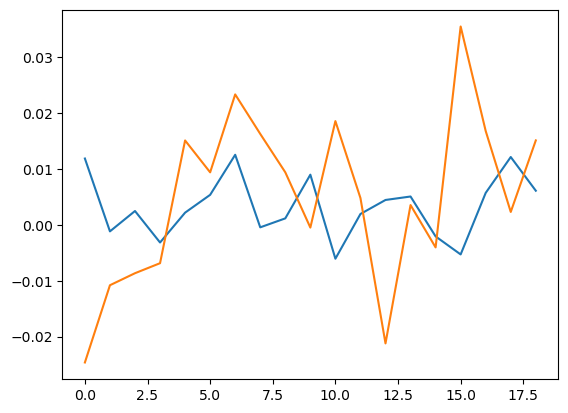

In [83]:
plt.plot(prediction[:,1])

In [84]:
prediction_train = decoder.predict(filtered_spikes[training_trial_indices])
RMSE_train = decoder.compute_rmse(prediction_train, signal)

In [85]:
RMSE_train.mean(axis=0)

array([0.00607015, 0.0132845 ])

In [ ]:
RMSE_train.mean(axis=0)

In [68]:
prediction_train.shape

(19, 2000, 2)

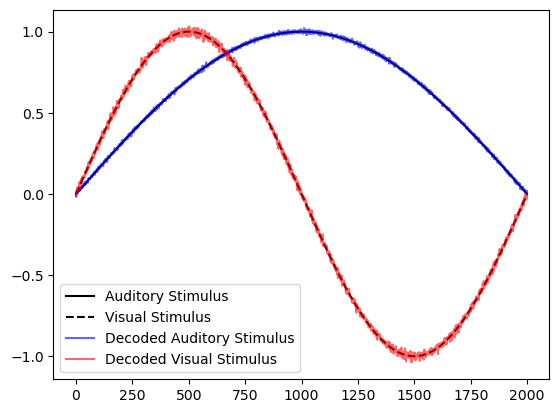

In [69]:
plt.plot(signal[0], "-k", label="Auditory Stimulus")
plt.plot(signal[1], "--k", label="Visual Stimulus")

plt.plot(prediction_train[0,:,0], "b", alpha=0.6, label="Decoded Auditory Stimulus")
plt.plot(prediction_train[0,:,1], "r", alpha=0.6, label="Decoded Visual Stimulus")

plt.legend()

In [ ]:
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)